In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import optimistix

from typing import NamedTuple
from functools import partial

In [10]:
import xylo
import xylo.types as t
import xylo.woods
import xylo.cut

import xylo.receptance as r
import xylo.sweep as xs

import xylo.loss.receptance as xlr

2024-05-12 07:44:35,212 - jax._src.xla_bridge - INFO - Unable to initialize backend 'cuda': 
2024-05-12 07:44:35,212 - jax._src.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2024-05-12 07:44:35,213 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


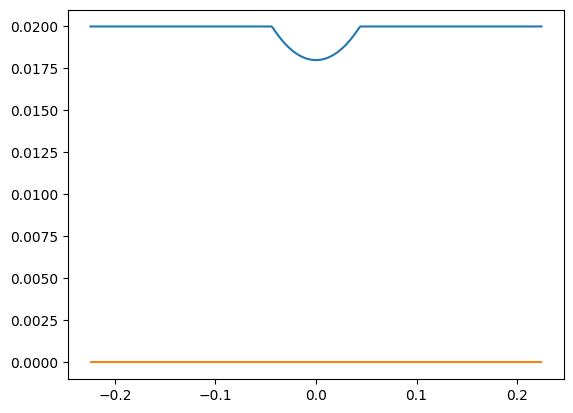

In [11]:
bar = t.BarProps(width = 0.040, depth = 0.020, length = 0.450, elements = 300, min_depth = 0.010)
cut = t.CutCubic(1.0, 1.0, 0.018)
sections = xylo.cut.cubic(bar, cut)
sections.plot(to_scale = False)

In [12]:
r.receptance(xylo.woods.rosewood, bar, sections, 100)

Array([[-0.00102943, -0.00340451],
       [-0.00340451, -0.01493466]], dtype=float64)

In [13]:
sweep_opts = t.sweep_default
xs.sweep(xylo.woods.rosewood, bar, sections, sweep_opts).harmonics

Array([ 442.08937228, 1239.27592341, 2283.35923444], dtype=float64)

In [14]:
# solver = optimistix.GradientDescent(learning_rate = 0.001, rtol = 0.0000001, atol = 0.0000001)
solver = optimistix.BFGS(rtol = 0.0000001, atol = 0.0000001)
# solver = optimistix.NonlinearCG(rtol = 0.000001, atol = 0.000001)

solver = optimistix.BestSoFarMinimiser(solver)

y0 = t.CutCubic(1.0, 1.0, 0.018)

fundamental = 440

args = (xylo.woods.rosewood, bar, fundamental, jnp.array([[0.5, 0.5], [1, -1.0], [2, 0.5], [3, -0.9], [4, 0.5], [5, -0.8]]))

sol = optimistix.minimise(xlr.loss_, solver = solver, y0 = y0, args = args, max_steps = None)

[-3.43551010e-06  1.35123164e-04 -3.50087950e-07 -1.40016879e-06
 -1.70734356e-07  5.01923723e-07]
[-3.57550751e-06  1.16145308e-05 -3.74859815e-07 -1.40249622e-06
 -1.83761439e-07  2.60778180e-07]
[-3.57550751e-06  1.16145308e-05 -3.74859815e-07 -1.40249622e-06
 -1.83761439e-07  2.60778180e-07]
[-3.57550751e-06  1.16145308e-05 -3.74859815e-07 -1.40249622e-06
 -1.83761439e-07  2.60778180e-07]
[-3.57550751e-06  1.16145308e-05 -3.74859815e-07 -1.40249622e-06
 -1.83761439e-07  2.60778180e-07]
[-3.57550751e-06  1.16145308e-05 -3.74859815e-07 -1.40249622e-06
 -1.83761439e-07  2.60778180e-07]
[-3.57550751e-06  1.16145308e-05 -3.74859815e-07 -1.40249622e-06
 -1.83761439e-07  2.60778180e-07]
[-3.57550751e-06  1.16145308e-05 -3.74859815e-07 -1.40249622e-06
 -1.83761439e-07  2.60778180e-07]
[-3.57550751e-06  1.16145308e-05 -3.74859815e-07 -1.40249622e-06
 -1.83761439e-07  2.60778180e-07]
[-3.57550751e-06  1.16145308e-05 -3.74859815e-07 -1.40249622e-06
 -1.83761439e-07  2.60778180e-07]
[-3.575326

In [15]:
print(sol.value)

CutCubic(cubic=Array(0.99999064, dtype=float64), square=Array(0.99977699, dtype=float64), offset=Array(0.01993777, dtype=float64))


In [16]:
sweep_opts = t.sweep_default
sec = xylo.cut.cubic(bar, sol.value)
xs.sweep(xylo.woods.rosewood, bar, sec, sweep_opts).harmonics

Array([ 462.28412659, 1238.81075248, 2332.77168349], dtype=float64)

In [17]:

import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

In [18]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Perform optimization
cost, pos = optimizer.optimize(xlr.loss_, iters=1000)

2024-05-12 07:44:40,371 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/1000


TypeError: loss_() missing 1 required positional argument: 'args'